In [240]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [241]:
data = pd.read_csv(r'C:\Users\NGH\Documents\Stage Ari\ArkeUp\20210610_pf-envtest_batteryMilliVolts.csv',sep=',',on_bad_lines='skip',chunksize=3574457)
data = pd.DataFrame(data.get_chunk(3574457))
df = data.copy()
df

,_id,id,externalId,name,pfVehicleId,type,value,dateTime,providerType,metaDataProvider
0,6063834e304a3d000e1cf0f2,c93b15d6-e7ce-4e82-8d64-5ebb1a50b3a5,212014918914083,PF-65062,PF-65062,batteryMilliVolts,5412.0,2020-07-31T02:21:40Z,Samsara,"{""batteryMilliVolts"":{""time"":""2020-07-31T02:21..."
1,6063834e304a3d000e1cf0f9,9e77fdd9-c7ad-42f7-b703-f040b2eb5007,212014918915100,ST-14867,ST-14867,batteryMilliVolts,25864.0,2021-03-30T19:18:24Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:18..."
2,6063834e304a3d000e1cf10d,b7cf79a0-7c2e-42fc-9955-b34dc998670b,212014918915223,PF-78663,PF-78663,batteryMilliVolts,1211.0,2021-03-30T10:51:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T10:51..."
3,6063834e304a3d000e1cf112,86382b2f-7315-40a1-aa8e-eea795191f85,844424930157962,98729,98729,batteryMilliVolts,14469.0,2021-03-30T19:59:34Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:59..."
4,6063834e304a3d000e1cf103,d124506b-59f1-4612-9df5-9797a964a040,212014918886624,PF-80093,PF-80093,batteryMilliVolts,12525.0,2021-03-30T19:13:39Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:13..."
...,...,...,...,...,...,...,...,...,...,...
3574452,6075ed59c577c4000c603916,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12835.0,2021-04-13T19:03:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T19:03..."
3574453,6075ed59c577c4000c603917,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12839.0,2021-04-13T18:53:15Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:53..."
3574454,6075ed59c577c4000c603918,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12837.0,2021-04-13T18:55:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:55..."
3574455,6075ed59c577c4000c603919,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12833.0,2021-04-13T18:51:15Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:51..."


In [242]:
alert_data = pd.read_csv(r'C:\Users\NGH\Documents\Stage Ari\ArkeUp\20210610_pf-envtest_alertNotification.csv',sep=',',on_bad_lines='skip')
alert_df = alert_data.copy()
alert_df

,_id,subject,description,type,externalId,name,time,code,status,nbOccurrence,lastOccurenceTime,createCaseResultDto._id,createCaseResultDto.success,createCaseResultDto.errors,_class
0,ffe4a402-87c4-4555-b794-ef09a2543f97,Tension batterie faible sur le parc PF-46590 (...,Tension batterie : 12867.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914482,PF-46590,2021-03-31T10:51:41Z,LowBatteryVoltage,CLOSED,2,2021-03-31T11:54:15Z,5001x00000C5MAkAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
1,bc73919d-89af-417c-a209-f67a97fac9e7,Tension batterie faible sur le parc PF-86135 (...,Tension batterie : 785.0 milliVolts - Parc : P...,LowBatteryVoltage,212014918915391,PF-86135,2021-03-31T10:57:46Z,LowBatteryVoltage,CLOSED,2,2021-04-01T10:38:40Z,5001x00000C5QSNAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
2,f66cf532-01e6-45e7-9d90-ec996ac65c38,Tension batterie faible sur le parc PF-85403 (...,Tension batterie : 23624.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914853,PF-85403,2021-03-31T10:51:57Z,LowBatteryVoltage,CLOSED,2,2021-03-31T11:56:21Z,5001x00000C5MB4AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
3,c63333b6-c1f0-4844-a6d3-96da5e7dd8ca,Tension batterie faible sur le parc PF-64767 (...,Tension batterie : 23630.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914474,PF-64767,2021-03-31T11:03:11Z,LowBatteryVoltage,PROCESSING,2,2021-03-31T12:07:39Z,5001x00000C5MAuAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
4,9027f222-15b1-4066-b6a3-fbd514d9f912,Tension batterie faible sur le parc PF-86128 (...,Tension batterie : 880.0 milliVolts - Parc : P...,LowBatteryVoltage,212014918915230,PF-86128,2021-03-31T11:06:24Z,LowBatteryVoltage,CLOSED,2,2021-04-01T10:54:15Z,5001x00000C5QSDAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4de78df4-cc8a-4ff2-99cd-c4abed4e6988,Tension batterie faible sur le parc PF-86055 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162511,PF-86055,2021-04-30T15:47:11Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:47:11Z,5001x00000C7SHuAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
99,8ff41406-1d11-4f0e-b826-809fb8eaa4c9,Tension batterie faible sur le parc PF-90842 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162429,PF-90842,2021-04-30T15:42:53Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:42:53Z,5001x00000C7SHzAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
100,19e7d8fc-0c05-4579-8874-e6748d5a6dd6,Tension batterie faible sur le parc PF-90843 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162465,PF-90843,2021-04-30T15:50:23Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:50:23Z,5001x00000C7SI4AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...
101,aeaa5134-55be-440c-b944-6f73147ba5ff,Tension batterie faible sur le parc PF-86054 (...,Tension batterie : 0.0 milliVolts - Parc : PF-...,LowBatteryVoltage,844424930162416,PF-86054,2021-04-30T15:56:57Z,LowBatteryVoltage,CLOSED,2,2021-04-30T15:56:57Z,5001x00000C7SI9AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...


# Preprocessing - nettoyage des données 🧹

In [243]:
df = df.drop(["_id","type","metaDataProvider","pfVehicleId","providerType"], axis=1)

In [244]:
df = df.dropna(subset=['name', 'value','dateTime'])

In [245]:
battery_as_array = np.array(df["value"]).reshape(-1, 1)
df["normalized_value"]= RobustScaler().fit_transform(battery_as_array)
rs_inverse = RobustScaler().fit(battery_as_array)#dénormalise

In [246]:
label = LabelEncoder()
df['id']=label.fit_transform(df['id'])

## Répartition des véhicules lourds et légers 🚚🚛

In [247]:
for vehicle in df['name'].unique():
    val_max = df['value'].loc[(df.name == vehicle)].max()
    if val_max <15000 :
        df.loc[df['name'] == vehicle , 'harshAccelerationSettingType'] = 'lightTruck' 
    else : 
        df.loc[df['name'] == vehicle , 'harshAccelerationSettingType'] = 'heavyDuty'

In [248]:
df_heavy = df.loc[df['harshAccelerationSettingType'] == 'heavyDuty']
df_light = df.loc[df['harshAccelerationSettingType'] == 'lightTruck']

In [249]:
df_heavy['name'].value_counts()

PF-65062        29108
PF-72713        12446
PF-79504        12002
PF-77277        11644
PF-61634        11426
                ...  
97111              15
97901              15
GKSV-K5K-6XJ        8
GCPY-FR7-WCG        5
GJDV-879-WJ6        1
Name: name, Length: 375, dtype: int64

## Choix du camion et de la période 🚚📆

In [285]:
df_test = df.loc[df.name == 'PF-51443']#vehicule léger
#df_test=df.loc[df.name == 'PF-85403']#véhicule lourd

df_test['dateTime']=pd.to_datetime(df_test['dateTime'])

#df_test=df_test[(df_test['dateTime'] >= '2021-03-30')&(df_test['dateTime'] < '2021-04-07')] #véhicule léger

C:\Users\NGH\AppData\Local\Temp\ipykernel_7552\3486999735.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ensuite, il faut choisir le type de train qu'on souhaite parmis les 3 prochaines cellules.

In [286]:
if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
    df_train=df.loc[df.name == 'PF-77174'] # train avec 1 véhicule léger
else :
    df_train=df.loc[df.name == 'PF-65062'] # train avec 1 véhicule lourd
df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')])
df_train=df_train[(df_train['dateTime'] >= '2021-03-30')&(df_train['dateTime'] < '2021-04-14')]

C:\Users\NGH\AppData\Local\Temp\ipykernel_7552\3146903773.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
# if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
#     df_train = df_light.copy() # entraînement sur tous les véhicules légers
# else :
#     df_train = df_heavy.copy() # entraînement sur tous les véhicules lourds
# df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')])
# df_train=df_train[(df_train['dateTime'] >= '2021-03-30')&(df_train['dateTime'] < '2021-04-14')]

In [253]:
# df_train = df.copy() # entraînement sur tous les véhicules confondus
# df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')]) # conversion de la colonne en type datetime
# df_train=df_train[df_train['dateTime'].dt.year > 2020]

# Preprocessing sur alertNotif

In [254]:
import re

On souhaite extraire la valeur de la batterie de la colonne "description" de type object.

In [255]:
alert_df['value']=[re.findall("\d+\.\d+", r)[0] for r in alert_df['description']] #re.findall returns list

In [256]:
alert_df['value'] = pd.to_numeric(alert_df['value'])
alert_df['value']

0      12867.0
1        785.0
2      23624.0
3      23630.0
4        880.0
        ...   
98         0.0
99         0.0
100        0.0
101        0.0
102        0.0
Name: value, Length: 103, dtype: float64

In [257]:
alert_df['time']=pd.to_datetime(alert_df['time'])

In [287]:
if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
    alert_test = alert_df.loc[alert_df.name == 'PF-51443'] #anomalies réelles du test poids léger
    alert_train = alert_df.loc[alert_df.name == 'PF-77174']#anomalies du train poids léger
else :
    alert_test = alert_df.loc[alert_df.name == 'PF-85403'] #anomalies réelles du test poids lourd
    alert_train = alert_df.loc[alert_df.name == 'PF-65062']#anomalies du train poids lourd

## Série temporelle

In [288]:
serie_train = df_train.set_index('dateTime')
#resampled_train = serie_train.resample('1H').interpolate()
resampled_train = serie_train.interpolate()
resampled_train = resampled_train.reset_index()

In [289]:
serie_test = df_test.set_index('dateTime')
#resampled_test = serie_test.resample('1H').mean().interpolate()
resampled_test = serie_test.interpolate()
resampled_test = resampled_test.reset_index()

In [290]:
# tst = alert_df.merge(df,how='inner') #test pour voir les véhicules en commun
# tst

In [291]:
import plotly.graph_objects as go

In [292]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resampled_train.dateTime, y=resampled_train['value'], mode='lines',name='Train'))
#fig.add_trace(go.Scatter(x=resampled_test.dateTime, y=resampled_test['value'],mode='lines+markers',name='Test'))
fig.add_trace(go.Scatter(x=alert_train.time, y=alert_train['value'],mode='markers',name='Anomaly Train',marker_size=8))
fig.add_trace(go.Scatter(x=resampled_test.dateTime, y=resampled_test['value'],mode='lines',name='Test'))
fig.add_trace(go.Scatter(x=alert_test.time, y=alert_test['value'],mode='markers',name='Anomaly Test',marker_size=8))
fig.update_layout(title="Comparaison série train et test",xaxis_title="Date",yaxis_title="Battery mV")
fig.show()

# Isolation Forest

Bashir Alam (25/04/2022). Isolation Forest. Consulté à l’adresse : https://hands-on.cloud/using-python-and-isolation-forest-algorithm-for-anomalies-detection/

In [264]:
from sklearn.ensemble import IsolationForest

In [293]:
train = pd.DataFrame({'normalized_value': resampled_train.normalized_value})
test = pd.DataFrame({'normalized_value': resampled_test.normalized_value})

In [294]:
model = IsolationForest(contamination=float(0.01)).fit(train)
test['anomaly'] = pd.Series(model.predict(test))

C:\Users\NGH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [295]:
test = test.set_index(resampled_test.dateTime)
test['value']=rs_inverse.inverse_transform(np.array(test['normalized_value']).reshape(-1, 1))
test

,normalized_value,anomaly,value
dateTime,,,
2021-03-30 19:52:54+00:00,-0.745935,-1,11322.0
2021-03-30 20:13:04+00:00,-0.679878,-1,11452.0
2021-03-30 20:47:19+00:00,-0.680894,-1,11450.0
2021-03-30 19:58:56+00:00,-0.674797,-1,11462.0
2021-03-30 20:23:10+00:00,-0.678862,-1,11454.0
...,...,...,...
2021-04-05 02:07:30+00:00,-3.808435,-1,5295.0
2021-04-05 02:07:30+00:00,-3.808435,-1,5295.0
2021-04-05 02:07:30+00:00,-3.808435,-1,5295.0


In [296]:
test.loc[test.anomaly == -1]

,normalized_value,anomaly,value
dateTime,,,
2021-03-30 19:52:54+00:00,-0.745935,-1,11322.0
2021-03-30 20:13:04+00:00,-0.679878,-1,11452.0
2021-03-30 20:47:19+00:00,-0.680894,-1,11450.0
2021-03-30 19:58:56+00:00,-0.674797,-1,11462.0
2021-03-30 20:23:10+00:00,-0.678862,-1,11454.0
...,...,...,...
2021-04-05 02:07:30+00:00,-3.808435,-1,5295.0
2021-04-05 02:07:30+00:00,-3.808435,-1,5295.0
2021-04-05 02:07:30+00:00,-3.808435,-1,5295.0


In [297]:
alert_df[alert_df.name == 'PF-51443'] #véhicule léger

,_id,subject,description,type,externalId,name,time,code,status,nbOccurrence,lastOccurenceTime,createCaseResultDto._id,createCaseResultDto.success,createCaseResultDto.errors,_class,value
18,86e5feb3-8795-4418-b33b-6803b7eae079,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10220.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 14:47:42+00:00,LowBatteryVoltage,CLOSED,2,2021-03-31T14:47:42Z,5001x00000C5NWQAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10220.0
20,344e686f-f3a7-42e4-bed8-d7f89af4d3e3,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10220.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 14:47:42+00:00,LowBatteryVoltage,CLOSED,1,2021-03-31T14:47:42Z,5001x00000C5NXdAAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10220.0
21,9d43b76c-ab5e-421f-8d24-6fad1a9ce5cd,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10220.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 14:47:42+00:00,LowBatteryVoltage,CLOSED,1,2021-03-31T14:47:42Z,5001x00000C5NZFAA3,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10220.0
23,119fc501-dc59-40c4-9e85-ad5f4573e3e0,Tension batterie faible sur le parc PF-51443 (...,Tension batterie : 10091.0 milliVolts - Parc :...,LowBatteryVoltage,212014918915165,PF-51443,2021-03-31 15:50:10+00:00,LowBatteryVoltage,PROCESSING,1,2021-03-31T15:50:10Z,5001x00000C5NguAAF,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,10091.0


In [298]:
alert_df[alert_df.name == 'PF-85403'] #véhicule lourd

,_id,subject,description,type,externalId,name,time,code,status,nbOccurrence,lastOccurenceTime,createCaseResultDto._id,createCaseResultDto.success,createCaseResultDto.errors,_class,value
2,f66cf532-01e6-45e7-9d90-ec996ac65c38,Tension batterie faible sur le parc PF-85403 (...,Tension batterie : 23624.0 milliVolts - Parc :...,LowBatteryVoltage,212014918914853,PF-85403,2021-03-31 10:51:57+00:00,LowBatteryVoltage,CLOSED,2,2021-03-31T11:56:21Z,5001x00000C5MB4AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,23624.0
16,e5390d6d-acd5-49cb-862f-5b40b95d3dac,Tension batterie faible sur le parc PF-85403 (...,Tension batterie : 665.0 milliVolts - Parc : P...,LowBatteryVoltage,212014918914853,PF-85403,2021-03-31 14:29:24+00:00,LowBatteryVoltage,CLOSED,1,2021-03-31T14:29:24Z,5001x00000C5NU0AAN,True,[ ],com.arkeup.data_iot.donnee.domainobject.AlertN...,665.0


En comparant avec le dataset AlertNotif et entraînant l'Isolation Forest avec les véhicules légers, on constate que nous n'obtenons pas les mêmes anomalies.

Si dans te le train, on prend juste un véhicule du même gabarit, c'est encore pire parce que toutes les données sont presques anormales.

Idem quand je veux faire le test avec un véhicule de poids lourd.

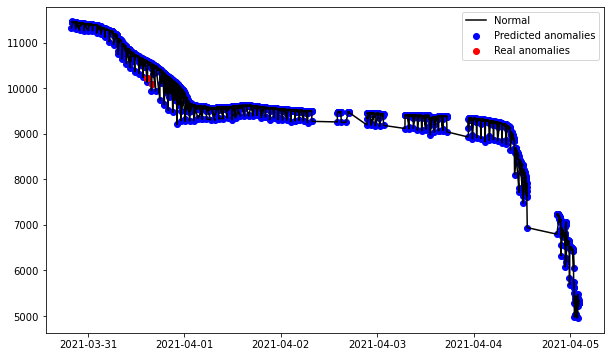

In [299]:
fig, ax = plt.subplots(figsize=(10,6))
a = test.loc[test['anomaly'] == -1, ['normalized_value']] #anomaly
ax.plot(test.index,  rs_inverse.inverse_transform(np.array(test['normalized_value']).reshape(-1, 1)), color='black', label = 'Normal')
ax.scatter(a.index, rs_inverse.inverse_transform(np.array(a['normalized_value']).reshape(-1, 1)), color='blue', label = 'Predicted anomalies')
ax.scatter(alert_test.time, alert_test['value'], color='red', label = 'Real anomalies')
plt.legend()
plt.show();

# Neural Network

Jason Brownlee (21/07/2016). Time Series Prediction with LSTM Recurrent Neural Networks. Consulté à l’adresse : https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [272]:
import tensorflow as tf
from tensorflow import keras

Conseil : entraîner le réseau sur une série régularisée pour simplifier et accélérer le temps d'entraînement du modèle.

In [300]:
serie_train = df_train.set_index('dateTime')
resampled_train = serie_train.resample('1H').mean().interpolate()
resampled_train = resampled_train.reset_index()

In [301]:
train, test = resampled_train, resampled_test

In [302]:
def create_dataset(X,Y,time_steps=1): # crée nos datasets train et test
    Xs, Ys = [],[]
    for i in range(len(X)-time_steps):
        v=X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        Ys.append(Y.iloc[i+time_steps])
        
    return np.array(Xs), np.array(Ys)

In [303]:
TIME_STEPS = 24

X_train, Y_train = create_dataset(train[['normalized_value']], train.normalized_value, TIME_STEPS)
X_test, Y_test = create_dataset(test[['normalized_value']], test.normalized_value, TIME_STEPS)

In [304]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(64,return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [305]:
history=model.fit(X_train, Y_train,epochs=10,batch_size=64*8,validation_split = 0.1,shuffle=False)

Epoch 1/10
1/1 [==============================] - 29s 29s/step - loss: 0.1055 - val_loss: 0.1325
Epoch 2/10
1/1 [==============================] - 1s 651ms/step - loss: 0.0961 - val_loss: 0.1205
Epoch 3/10
1/1 [==============================] - 0s 491ms/step - loss: 0.0883 - val_loss: 0.1062
Epoch 4/10
1/1 [==============================] - 0s 379ms/step - loss: 0.0887 - val_loss: 0.1007
Epoch 5/10
1/1 [==============================] - 0s 416ms/step - loss: 0.0916 - val_loss: 0.1021
Epoch 6/10
1/1 [==============================] - 0s 359ms/step - loss: 0.0908 - val_loss: 0.1064
Epoch 7/10
1/1 [==============================] - 0s 261ms/step - loss: 0.0888 - val_loss: 0.1112
Epoch 8/10
1/1 [==============================] - 0s 259ms/step - loss: 0.0871 - val_loss: 0.1153
Epoch 9/10
1/1 [==============================] - 0s 242ms/step - loss: 0.0864 - val_loss: 0.1185
Epoch 10/10
1/1 [==============================] - 0s 267ms/step - loss: 0.0867 - val_loss: 0.1200


10/10 [==============================] - 4s 28ms/step


C:\Users\NGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



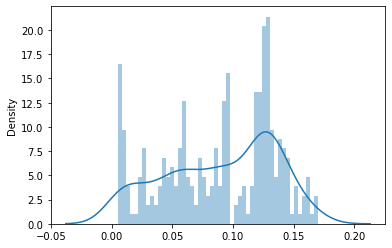

In [306]:
import seaborn as sns
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred-X_train),axis=1)
sns.distplot(train_mae_loss, bins=50, kde=True);

81/81 [==============================] - 2s 21ms/step


C:\Users\NGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



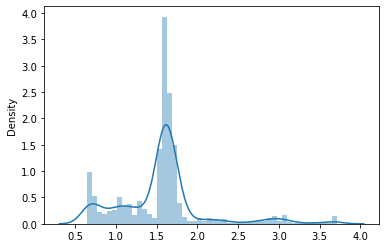

In [307]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test),axis=1)
sns.distplot(test_mae_loss, bins=50, kde=True);

In [308]:
#seuil à choisir pour couper les données normales / anormales
#seuils véhicule léger en test
THRESHOLD = 2.0 #  (train 1 véhicule et les autres véhicules de même gabarit)#
#THRESHOLD = 3.0 # seuil train dataset entier

#seuils véhicule lourd en test
#THRESHOLD = 5.75 #  (train 1 véhicule)
#THRESHOLD = 3 #  (train avec les autres véhicules de même gabarit)
#THRESHOLD = 6.0 # seuil train dataset entier

test_score_df = test[TIME_STEPS:].copy()
test_score_df['loss']= test_mae_loss
test_score_df['threshold']= THRESHOLD
test_score_df['anomaly']=test_score_df.loss > test_score_df.threshold

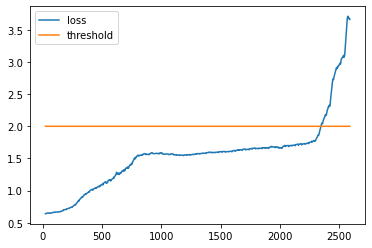

In [309]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.legend();

In [310]:
anomalies= test_score_df[test_score_df.anomaly == True]
anomalies

,dateTime,id,externalId,name,value,normalized_value,harshAccelerationSettingType,loss,threshold,anomaly
2346,2021-04-04 11:08:18+00:00,1519615,212014918915165,PF-51443,8520.0,-2.169715,lightTruck,2.002560,2.0,True
2347,2021-04-04 10:52:10+00:00,1519615,212014918915165,PF-51443,8590.0,-2.134146,lightTruck,2.010934,2.0,True
2348,2021-04-04 10:28:00+00:00,1519615,212014918915165,PF-51443,8676.0,-2.090447,lightTruck,2.017250,2.0,True
2349,2021-04-04 11:00:16+00:00,1519615,212014918915165,PF-51443,8559.0,-2.149898,lightTruck,2.022712,2.0,True
2350,2021-04-04 10:54:12+00:00,1519615,212014918915165,PF-51443,8565.0,-2.146850,lightTruck,2.031792,2.0,True
...,...,...,...,...,...,...,...,...,...,...
2585,2021-04-05 02:07:30+00:00,1339317,212014918915165,PF-51443,5295.0,-3.808435,lightTruck,3.671167,2.0,True
2586,2021-04-05 02:07:30+00:00,303945,212014918915165,PF-51443,5295.0,-3.808435,lightTruck,3.672291,2.0,True
2587,2021-04-05 02:07:30+00:00,67032,212014918915165,PF-51443,5295.0,-3.808435,lightTruck,3.672994,2.0,True
2588,2021-04-05 02:07:30+00:00,585085,212014918915165,PF-51443,5295.0,-3.808435,lightTruck,3.666252,2.0,True


C:\Users\NGH\AppData\Local\Temp\ipykernel_7552\3116665894.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\NGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



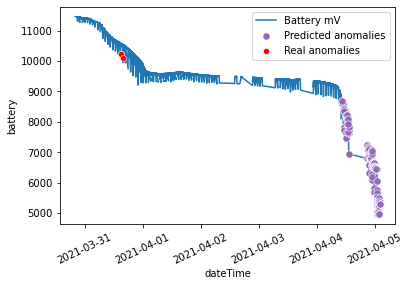

In [311]:
anomalies['battery']=rs_inverse.inverse_transform(np.array(anomalies.normalized_value).reshape(-1, 1))
plt.plot(test[TIME_STEPS:].dateTime, rs_inverse.inverse_transform(np.array(test_score_df['normalized_value']).reshape(-1, 1)),label='Battery mV',zorder=-1)
sns.scatterplot(anomalies.dateTime, anomalies['battery'],color=sns.color_palette()[4], s=52, label='Predicted anomalies',zorder=1)
sns.scatterplot(alert_test.time, alert_test['value'], color='red', label = 'Real anomalies',zorder=1)
plt.xticks(rotation=25)
plt.legend();